# BMI 6018
## Fall 2017
### M3-Numerics Homework 

In [1]:
import numpy as np
%matplotlib inline
from nose.tools import assert_equal
from numpy.testing import assert_array_equal, assert_allclose
import seaborn as sns

### Additional packages

We are going to install some additional packages using the *conda* function that comes with Anconda.

* ``ipywidgets`` will allow us to use interactive widgets in the notebook
* ``holoviews`` is a visualization package that allows you to attach semantic meaning to data
* ``seaborn`` is an extension/improvement of matplotlib

**Problem 1 (20 points):** BMI is a person's weight in kilograms divided by the square of height in meters. 

Below I am reading in actual heights (in inches) and weights (in kgs) of individual patients in the MIMIC2 database. 

Modify the function `bmi` to return an array with the bmi value computed for each person given their height and weight. The elements of the arrays are aligned so the nth element of each array corresponds to the nth patient.

In [3]:
h = np.fromfile("./numeric_mimic_heights.txt",sep=",")
w = np.fromfile("./numeric_mimic_weights.txt",sep=",")

In [33]:
from math import *

def bmi(h, w):
    # YOUR CODE HERE
    bmis = []
    for x in range(0,len(h)):
        bmis.append(w[x] / (h[x]*2.54/100.0)**2)
    
    bmis = np.array(bmis)
    
    return bmis
    raise NotImplementedError()

In [34]:
### BEGIN HIDDEN TEST
ht = np.random.normal(60, 10, size=100)
wt = np.random.normal(70, 20, size=100)
assert_array_equal(bmi(ht, wt), 
                   wt/(ht*2.54/100.0)**2)
### END HIDDEN TEST

### Here is a visualizations  of the data 

We'll learn more details about these packages later in the class.

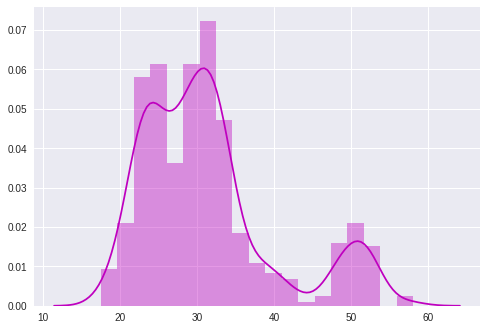

In [35]:
sns.distplot(bmi(h,w),color="m")


**Problem 2 (20 points):** Finding roots of a quadratic equation.

For the general quadratic equation $ax^2+bx+c=0$, the quadratic formula is $x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}$.

I have provided a skeleton code below for a function that takes three arguments (a,b,c) and computes the the roots for the quadratic equation with these coefficients. Using the [math library](https://docs.python.org/3/library/math.html), complete the function `find_roots` to return the two roots for $x$ given $a, b, c$. 

In [38]:
import math

def find_roots(a=1,b=1,c=1):
    """
    This is a docstring. It is what the help() function returns
    about this function.
    """
    # YOUR CODE HERE
    x = b**2-4*a*c
    
    r1 = (-b - math.sqrt(x))/(2*a)
    r2 = (-b + math.sqrt(x)) /(2*a)
    
    return r1, r2
    
    raise NotImplementedError()

In [39]:
assert_equal(find_roots(1,5,6),(-3.0, -2.0))
assert_equal(find_roots(1,-1,-2), (-1.0, 2.0))
assert_equal(find_roots(2,4,-4), (-2.732050807568877, 0.7320508075688772))

**Problem 3 (10 Points):** HIPAA allows researchers who do not have informed consent from study subjects to only know their age within decades. Modify the function `age_string` to take as an input argument an age in years (numeric) and returns a string giving the age in decades (e.g. 27 &#8594; "Age in 20s").

Note in my code fragment below, I use c-style string formatting to insert the computer program that takes an age in years and return a HIPAA compliant description of the age.

In [46]:
def age_string(age):
    decade = None
    # YOUR CODE HERE
    age = str(age)
    if len(age) == 1:
        decade = 0
    else:
        decade = str(age)[0] + "0"
    
    return "Age in %ds"%int(decade)
    raise NotImplementedError()

In [47]:
assert_equal(age_string(28.9), "Age in 20s")
assert_equal(age_string(55), "Age in 50s")
assert_equal(age_string(6), "Age in 0s")

**Problem 4 (20 points):** X-ray attenuation in the human body can be described with the Lambert-Beers law 
$$ I = I_0e^{-\mu L}$$
where $I_0$ is the incident x-ray intensity, I is the transmitted x-ray intensity, *µ* is the linear attenuation coefficient of the material, and *L* is the thickness of the material. µ is a combination of the attenuation due to photoelectric interactions, Compton interactions, and Rayleigh scattering. In medical applications, the linear attenuation is usually reported as the Hounsfield unit (HU) defined as 
$$HU = 1000\times \frac{\mu-\mu_{\text{water}}}{\mu_{\text{water}}-\mu{\text{air}}},$$ 
where $\mu_{\text{water}} =0.1928 \text{cm}^{-1}$ and $\mu_{\text{air}} = 0.0002 \text{cm}^{-1}$. 
    
Modify the function `hounsfield` that takes a transmitted x-ray intensity, an incident x-ray intensity, and object thickness and returns the average HU for the object.

In [55]:

def hounsfield(I, I0, L):
    # YOUR CODE HERE
    mu = -math.log(I / I0) / L
    print (mu)
    muwater = 0.1928
    muair = 0.0002
    
    #hu = 1000 * ((mu - muwater) / (muwater - muair))
    
    return mu
    raise NotImplementedError()


In [56]:
assert_equal(hounsfield(0.2, 1.0, 8), 0.20117973905426254)
assert_equal(hounsfield(0.4, 1.0, 4), 0.22907268296853875)
assert_equal(hounsfield(0.8, 1.0, 10), 0.022314355131420972)


0.20117973905426254
0.22907268296853875
0.022314355131420972


**Problem 5 (10 points):** Thick of a problem you might be interested in tackling for your term project. Describe numeric data that could be associated with your term project. Would you represent the data with floats or integers?

I would like to experiment with a scoring program that takes in a VCF file, fetches annotations, and calculates a score for each variant. The goal would be to use the patient's existing health data to determine what kind of score the variant gets (e.g., Sally has is known to have hypertension so we will score variants associated with heart disease higher than others). This would use integers and would begin with scores from annotation fields which are already included by many annotation tools. My program would augment these scores using external health data. 

**Problem 6 (10 points):** In the problems below we denote an intger in some arbitrary base $b$ as $xyz_b$. For each of the problems below, convert the numbers to base 10 integers. Change the solution integers (e.g. `n1`) from `None` to the appropriate base 10 integer (numeric value).

$101101_2$ (Binary number, base-2)

In [60]:
n1 = None
# YOUR CODE HERE
n1 = int("101101", 2)
print (n1)
#raise NotImplementedError()

45


$D_{16}$ (Base 16)

In [62]:
n2 = None
# YOUR CODE HERE
n2 = int("D", 16)
print (n2)
#raise NotImplementedError()

13


$120_7$

In [65]:
n3 = None
# YOUR CODE HERE
n3 = int("120", 7)
print (n3)
#raise NotImplementedError()

63


$12_3$

In [66]:
n4 = None
# YOUR CODE HERE
n4 = int("12", 3)
print (n4)
#raise NotImplementedError()

5


$31_8$

In [67]:
n5 = None
# YOUR CODE HERE
n5 = int("31", 8)
print (n5)
#raise NotImplementedError()

25
